In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Load Dataset

In [2]:
df = pd.read_csv("data\heart-disease-prediction.csv")
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

Dataset shape: (4238, 16)
Columns: ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Janak Dangi\AppData\Local\Temp\ipykernel_6116\3852576248.py:1: SyntaxWarning: invalid escape sequence '\h'
  df = pd.read_csv("data\heart-disease-prediction.csv")


In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
# cleaning
df = df.drop_duplicates().reset_index(drop=True)

In [6]:
# Fill numeric missing values with median, categorical with mode
for c in df.select_dtypes(include=[np.number]).columns:
    df[c] = df[c].fillna(df[c].median())
for c in df.select_dtypes(include=["object"]).columns:
    df[c] = df[c].fillna(df[c].mode().iloc[0])

In [7]:
#  Define target and features
target = "TenYearCHD"
X = df.drop(columns=[target])
y = df[target].astype(int)

In [8]:
X = pd.get_dummies(X, drop_first=True)

In [9]:
import seaborn as sns

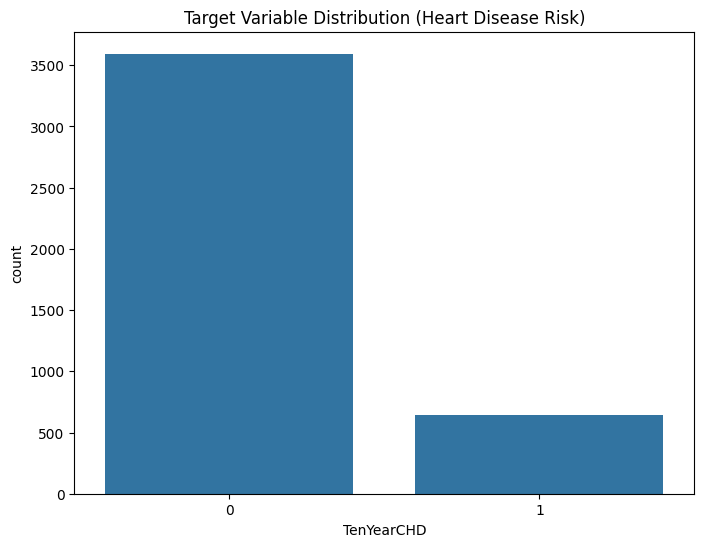

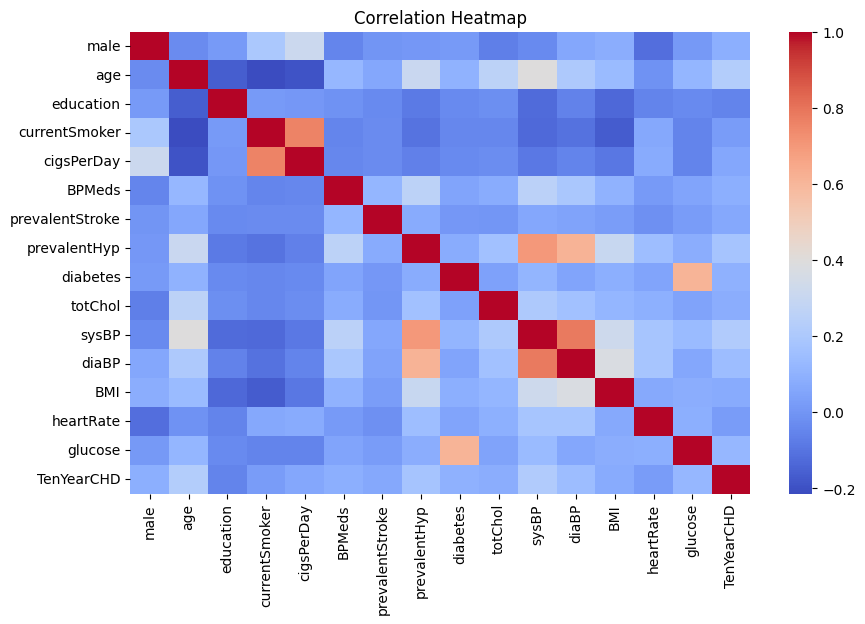

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x="TenYearCHD", data=df)
plt.title("Target Variable Distribution (Heart Disease Risk)")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
target = "TenYearCHD"
X = df.drop(columns=[target])
y = df[target].astype(int)

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, class_weight="balanced")
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

In [16]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, confusion_matrix
)

In [17]:
print("\nPerformance (Logistic Regression):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Performance (Logistic Regression):
Accuracy: 0.6709905660377359
Precision: 0.25
Recall: 0.5813953488372093
F1 Score: 0.34965034965034963
ROC AUC: 0.698472253668424

Confusion Matrix:
 [[494 225]
 [ 54  75]]


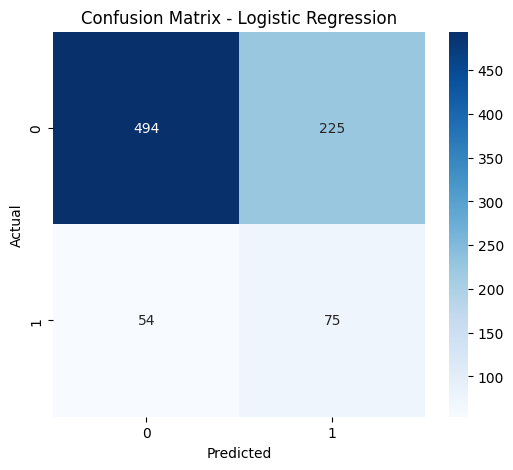

In [18]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

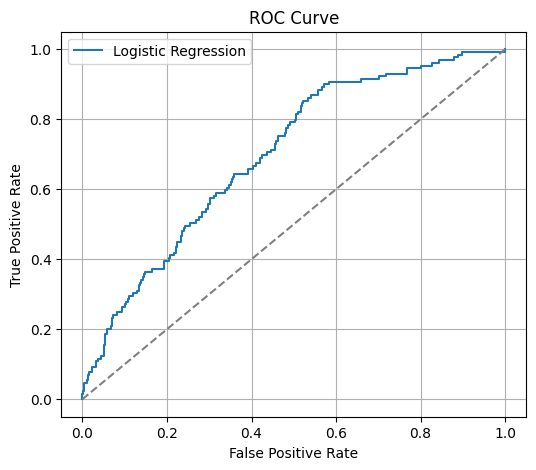

In [19]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Janak Dangi\AppData\Local\Temp\ipykernel_6116\623158039.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coeffs.values, y=coeffs.index, palette="coolwarm")


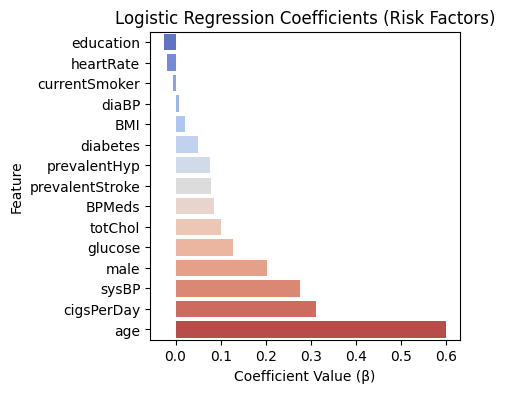

In [20]:
coeffs = pd.Series(logreg.coef_[0], index=X.columns).sort_values()

plt.figure(figsize=(4, 4))
sns.barplot(x=coeffs.values, y=coeffs.index, palette="coolwarm")
plt.title("Logistic Regression Coefficients (Risk Factors)")
plt.xlabel("Coefficient Value (β)")
plt.ylabel("Feature")
plt.show()